In [9]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [44]:
files <- c(
  'Guan & Zhang' = 'challenge=C2_group=GuanLab.tsv',
  'Hu' = 'challenge=C2_group=Jingyuan_Hu.tsv',
  'Kwak & Gong (KRD)' = 'challenge=C2_group=Kwak_Gong.v2.tsv',
  'Kwak & Gong (WHD)' = 'challenge=C2_group=Kwak_gong_weighted_hamming_TreeCmp.tsv',
  'Yosef Lab' = 'challenge=C2_group=MJ.tsv'
)
d <- do.call('rbind', lapply(1:length(files), function(i){
  x <- read.table(files[i], header = TRUE, sep = '\t')
  cbind(x, method = names(files)[i])
})) %>%
  mutate(method = factor(method, names(files)))

In [45]:
head(d)

,sample,rf,triplet,method
,<int>,<dbl>,<dbl>,<fct>
1,1,0.7158,0.7417,Guan & Zhang
2,2,0.7363,0.5543,Guan & Zhang
3,3,0.6034,0.5931,Guan & Zhang
4,4,0.6443,0.7805,Guan & Zhang
5,5,0.6545,0.8522,Guan & Zhang
6,6,0.7158,0.7299,Guan & Zhang


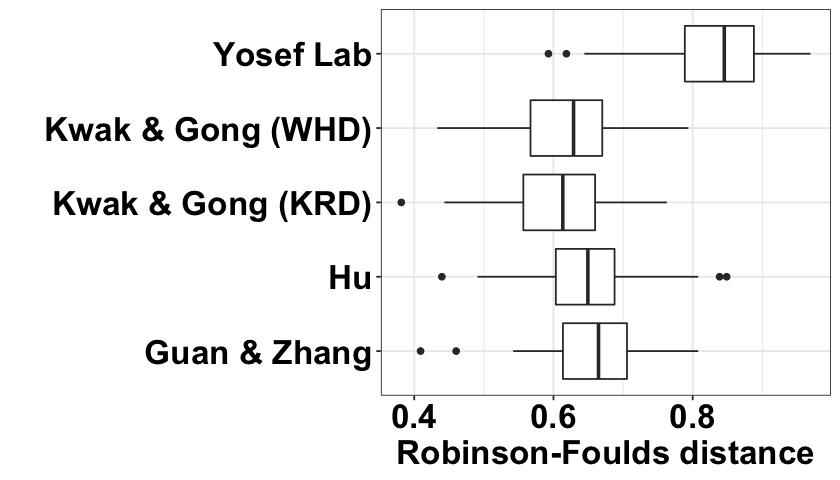

In [46]:
options(repr.plot.width = 7, repr.plot.height = 4)
d %>%
  ggplot(aes(x = method, y = rf)) + 
  geom_boxplot() +
  coord_flip() + 
  theme_bw() +
  xlab('') + ylab('Robinson-Foulds distance') +
  theme(axis.text = element_text(size = 20, face = 'bold', color="black")) +  
  theme(axis.title = element_text(size = 20, face = 'bold', color = 'black'))

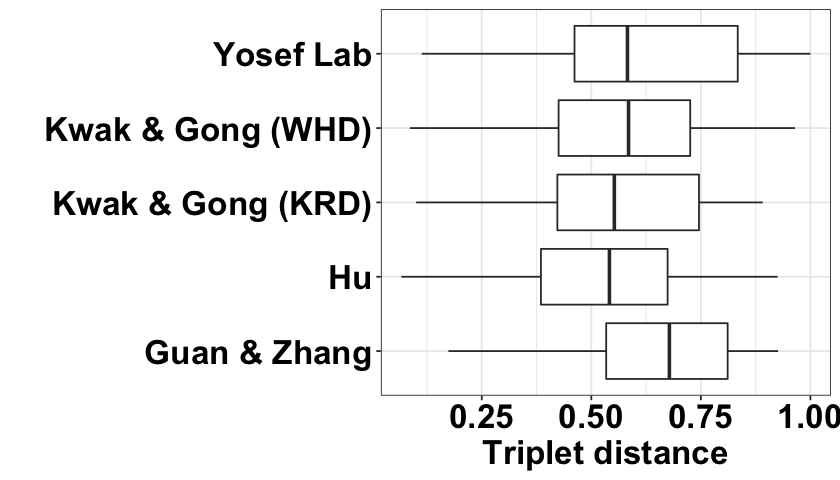

In [47]:
options(repr.plot.width = 7, repr.plot.height = 4)
d %>%
  ggplot(aes(x = method, y = triplet)) + 
  geom_boxplot() +
  coord_flip() + 
  theme_bw() +
  xlab('') + ylab('Triplet distance') +
  theme(axis.text = element_text(size = 20, face = 'bold', color="black")) +  
  theme(axis.title = element_text(size = 20, face = 'bold', color = 'black'))

In [48]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.3

Matrix products: default
BLAS/LAPACK: /Users/gongx030/anaconda3/envs/r/lib/libopenblasp-r0.3.7.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_0.8.5   ggplot2_3.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4       magrittr_1.5     tidyselect_1.0.0 munsell_0.5.0   
 [5] uuid_0.1-4       colorspace_1.4-1 R6_2.4.1         rlang_0.4.5     
 [9] fansi_0.4.1      tools_3.6.3      grid_3.6.3       gtable_0.3.0    
[13] cli_2.0.2        withr_2.1.2      htmltools_0.4.0  ellipsis_0.3.0  
[17] lazyeval_0.2.2   digest_0.6.25    assertthat_0.2.1 tibble_3.0.0    
[21] lifecycle_0.2.0  crayon_1.3.4     IRdisplay_0.7.0  farver_2.0.3    
[25] purrr_0.3.4      repr_1.1.0       vctrs_0.2.4      base64enc_0.1-3 